## Цель работы
Изучение алгоритмов и методов регрессии на практике.



## Ход выполнения работы

Перед началом работы импортируются библиотеки, необходимые для выполнения задания.

In [36]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Выполняется первое задание:
Часть 1 - Простая линейная регрессия
1. Обучить модель простой (парной) линейной регрессии, используя для обучения значения x1 и y.
2. Выполнить предсказание.
3. Создать датафрейм с истинными и предсказанными значениями. Вывести его
4. Подсчитать и вывести метрики качества регрессии ( MSE , MAE , RMSE , R2 ).
5. Вывести значение коэффициентов a и b.
6. Выполнить визуализацию регрессии: точки ( scatter plot ) и линия регрессии.
7. Построить график с разницей предсказанного и истинного значения по каждой точке.
8. Построить график.
9. Сделать выводы.

Создается функция для отображения графиков. В ней по очереди выводятся MAE, MSE, RMSE, R2. Так же в ней выводятся коэффициенты a и b. После этого строится график регрессии.

In [ ]:
def show_data(df_predictions, model, x, y, y_pred, y_test):
    print(df_predictions)

    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:', metrics.r2_score(y_test, y_pred))

    a = model.coef_
    b = model.intercept_
    
    print("a:", a)
    print("b:", b)

    plt.scatter(range(0, 10), [0* a + b, 10 * a + b], color='blue')
    plt.plot(range(0, 10), [0* a + b, 10 * a + b], color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Простая линейная регрессия")
    plt.show()

Создается функция для тренировки модели. Она принимает на вход тестовые и тренировочные данные. Внутри функции создается модель, обучается и делается предсказание. 

In [38]:
def train_linear_regression(x_train, y_train, x_test, y_test):
    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    return df_predictions, model, y_pred

Задаются начальные значения

In [39]:
y = [20.9, 20.7, 20.8, 20.9, 22.8, 22.4, 24.5] 

Данные разделяются на обучающую и тестовую выборки

In [40]:
x = [3, 3, 6, 6, 7, 8, 9]
x_train, x_test, y_train, y_test = train_test_split(np.array(x).reshape(-1, 1), y, test_size=0.25, random_state=0)

Используется ранее заданная функция для тренировки модели

In [41]:
df_predictions, model, y_pred = train_linear_regression(x_train, y_train, x_test, y_test)

Выводится датафрейм с истинными и предсказанными значениями. С помощью функции metrics подсчитываются и выводятся метрики качества регрессии (MSE, MAE, RMSE, R2).
Вычисляются коэффициенты a и b.
Строится график регрессии: точки (scatter plot) и линия регрессии.

   Actual  Predicted
0    24.5      22.80
1    20.8      21.75
MAE: 1.3249999999999993
MSE: 1.896249999999998
RMSE: 1.3770439353920405
R2: 0.4459459459459463
a: [0.35]
b: 19.65


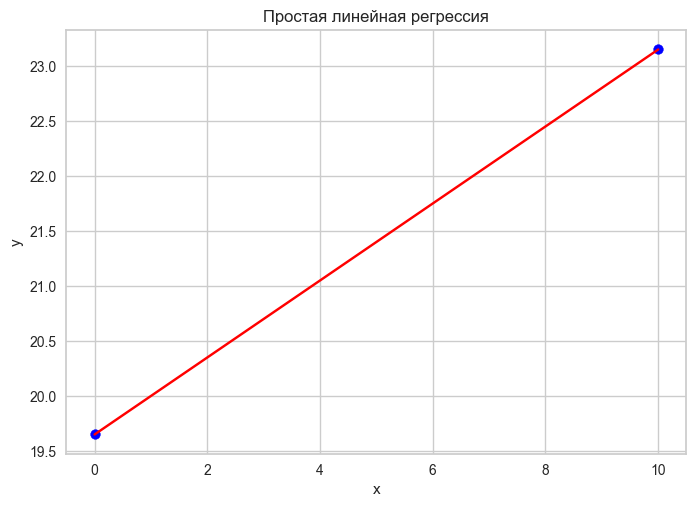

In [42]:
show_data(df_predictions, model, x, y, y_pred, y_test)

По метрикам видно, что модель в среднем ошибается на 1.3, что является неплохим результатом.
Так же видно, что модель слабо чувствительна к выбросам, что следует из MSE.
Из метрики R2 = 0.44 видно, что модель не считается приемлимой, так как коэф меньше 0.5.


Далее строится график с разницей предсказанного и истинного значения по каждой точке.

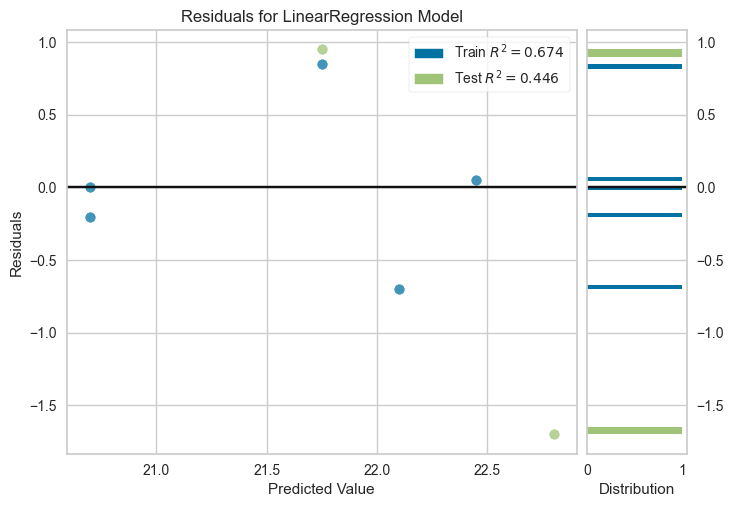

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
visualizer = ResidualsPlot(model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

С точностью 0.5 предсказано только 3 значения, остальные значения имеют ошибку в предсказании.

Строится график, на котором отображены актуальные и предсказанные значения.

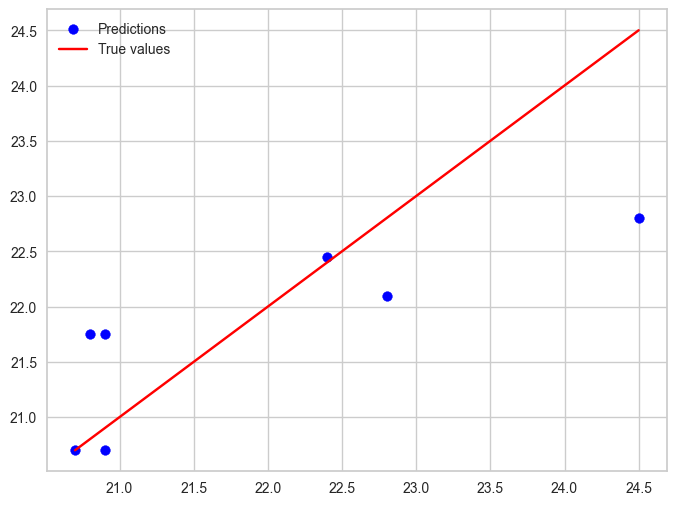

In [44]:
predictions_valid = model.predict(np.array(x).reshape(-1,1))
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions_valid, color='blue', label='Predictions')

sorted_indices = np.argsort(y)
sorted_y = np.array(y)[sorted_indices]

plt.plot(sorted_y, sorted_y, color='red', label='True values')
plt.legend(loc='upper left')

plt.show()

Из графика видно, что модель плохо предсказывает значения, так как линия регрессии не проходит через большинство точек. Так же видно, что по данным значениям не получится построить хорошую модель, так как они не подчиняются линейной зависимости.

Аналаогично выполняется задание для второй выборки:

In [45]:
x = [9, 8, 9, 7, 4, 5, 3]
x_train, xtest, y_train, y_test = train_test_split(np.array(x).reshape(-1, 1), y, test_size=0.25, random_state=0)

In [46]:
df_predictions, model, y_pred = train_linear_regression(x_train, y_train, x_test, y_test)

   Actual  Predicted
0    24.5  20.476744
1    20.8  21.805814
MAE: 2.5145348837209305
MSE: 8.599124526771233
RMSE: 2.932426388977434
R2: -1.512527253987213
a: [-0.44302326]
b: 24.46395348837209


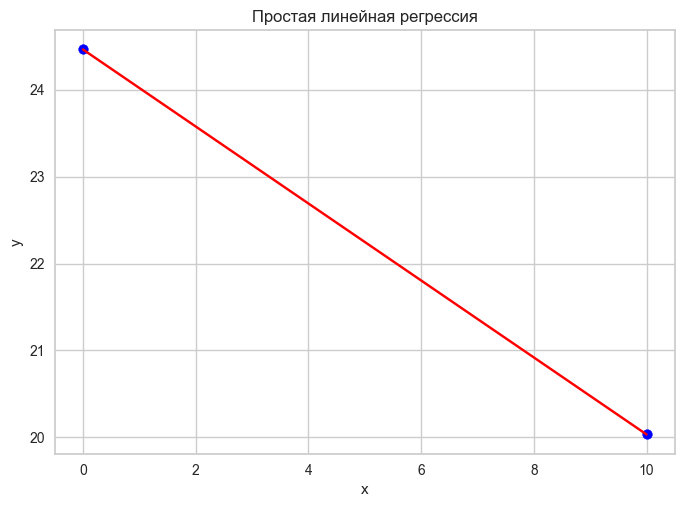

In [47]:
show_data(df_predictions, model, x, y, y_pred, y_test)

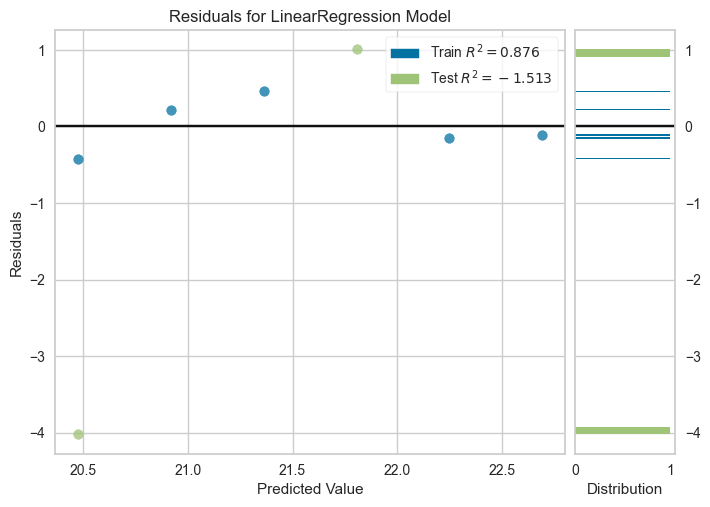

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [48]:
visualizer = ResidualsPlot(model)
visualizer.fit(np.array(x_train).reshape(-1,1), y_train)
visualizer.score(np.array(x_test).reshape(-1,1), y_test)
visualizer.show()

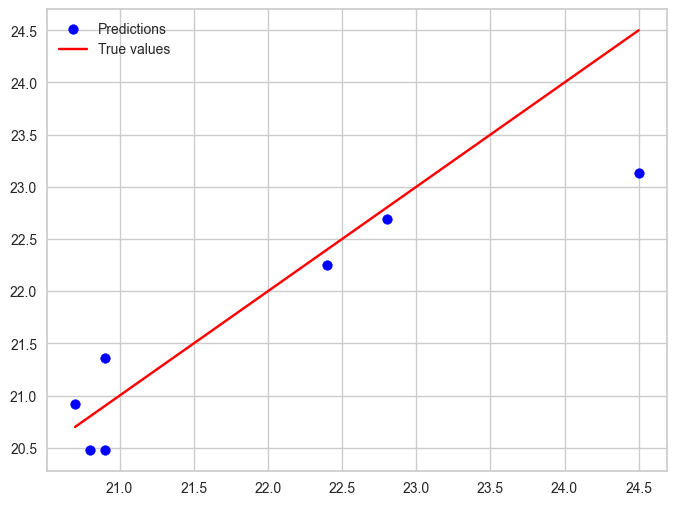

In [49]:
predictions_valid = model.predict(np.array(x).reshape(-1,1))
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions_valid, color='blue', label='Predictions')

sorted_indices = np.argsort(y)
sorted_y = np.array(y)[sorted_indices]

plt.plot(sorted_y, sorted_y, color='red', label='True values')
plt.legend(loc='upper left')

plt.show()

Из графика видно, что модель довольно хорошо предсказывает значения, так как линия регрессии проходит через большинство точек. Так же видно, что по данным значениям можно построить хорошую модель, так как они подчиняются линейной зависимости.

Часть 2 - Полиномиальная регрессия
1. Использовать PolynomialFeatures для реализации модели полиномиальной регрессии. Выбрать степень полинома самостоятельно.
2. Обучить модель полиномиальной регрессии.
3. Выполнить предсказание.
4. Подсчитать и вывести метрики качества регрессии ( MAE , R2 ).
5. Выполнить визуализацию регрессии: точки и линия регрессия.
6. Повторить пункты 15 минимум для ещё одной степени полинома ( degree ).
7. Сделать выводы.

Заполняются изначальные данные.

In [50]:
y = np.array([12.7, 20.0, 24.9, 21.5, 21.3, 20.4, 13.4]).reshape(-1, 1)
x = np.array([0, 1, 2, 3, 4, 5, 6]).reshape(-1, 1)

Создается функция, которая по заданной степени полинома обучает модель и строит график регрессии, а так же выводит MAE, R2.

In [51]:
def polynomial_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)

    model_p = LinearRegression()
    model_p.fit(x_poly, y)

    y_pred = model_p.predict(x_poly)

    mae = metrics.mean_absolute_error(y, y_pred)
    r2 = metrics.r2_score(y, y_pred)

    print(f"Степень полинома: {degree}")
    print(f"MAE: {mae}")
    print(f"R2: {r2}\n")

    plt.scatter(x, y, color='blue', label='Данные')
    plt.plot(x, y_pred, color='red', label=f'Полином степени {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Полиномиальная регрессия (степень {degree})')
    plt.show()
    

Строятся графики регрессии для полиномов 3 степени и 6 степени.

Степень полинома: 3
MAE: 1.0714285714285838
R2: 0.8985689034733119



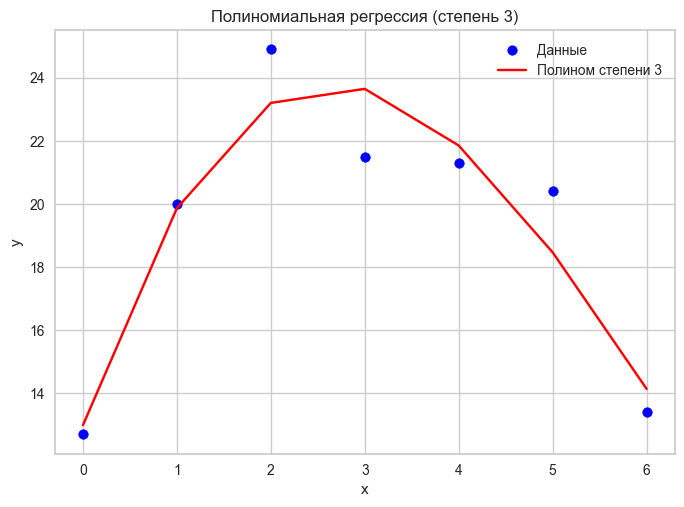

Степень полинома: 6
MAE: 3.928514656438762e-11
R2: 1.0



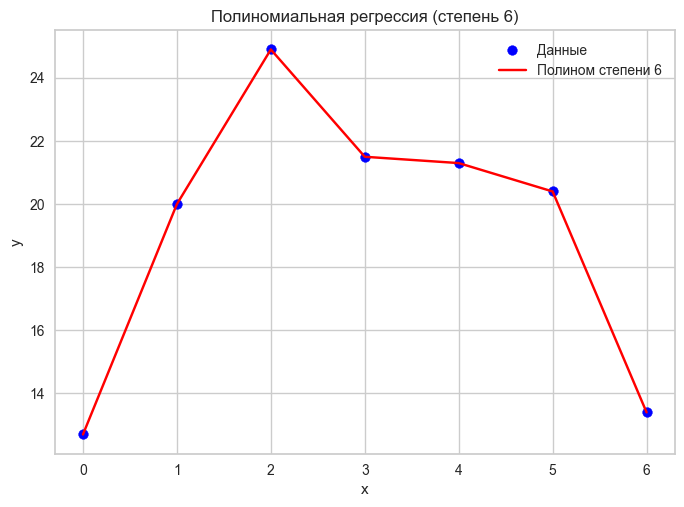

In [52]:

for degree in [3, 6]:
    polynomial_regression(degree)

По графикам видно, что полином третьей степени неплохо оценивает данные, так как линия регрессии проходит через большинство точек. Полином шестой степени переобучается, так как линия регрессии проходит через все точки.
При этом при увеличении степени полинома увеличивается точность предсказания, что видно из метрик MAE и R2. MAE уменьшается, а R2 увеличивается.

Часть 3 - Решение задачи регрессии различными методами:
1. Загрузить набор данных car_price.csv.
2. Выделить целевую переменную, которую необходимо предсказать (важно не ошибиться с выбором целевой переменной). Выполнить для целевой переменной визуализацию - построить гистограмму и boxplot.
3. Построить матрицу диаграмм рассеяния.
4. Разделить данные на обучающую и валидационные выборки.
5. Нормализовать числовые данные с помощью StandardScaler .
6. Обучить модель линейной регрессии с помощью LinearRegression .
7. Применить обученную модель на тестовой выборке и оценить её качество с помощью метрик (минимум 4 метрики).
8. Создать датафрейм с истинными и предсказанными значениями. Вывести его.
9. Создать датафрейм с признаками и значением коэффициентов для каждого признака. Сделать выводы относительно важности признаков.
10. Выполнить визуализацию. Отобразить на графике фактическое и предсказанное значение.
11. Для получения оценки 5 - реализовать регрессию методом k-ближайших соседей или деревом решений.
12. Для метода реализованного в пункте 11 подсчитать метрики, выполнить визуализацию фактического и предсказанного значения. Сравнить результаты, полученные всеми методами. Для этого может потребоваться визуализировать истинные и предсказанные значения на одном графике для разных методов.
13. Сделать выводе по работе. Описать, какой метод целесообразнее использовать.

Загружается набор данных.

In [53]:
df = pd.read_csv('car_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [54]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


По информации о колонках видно, что пропусков в данных нет.

Проводится проверка на явные дубликаты.

In [55]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено. 

Данные проверяются на неявные дубликаты.

In [56]:
columns = df.columns.where(df.dtypes == 'object').dropna()
for column in columns:
  print(f"Уникальные значения в столбце {column}:")
  print(df[column].unique())

Уникальные значения в столбце CarName:
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick centu

Были найдены неявные дубликаты, они переименовываются.

In [57]:
df['CarName'] = df['CarName'].replace({'audi 100ls': 'audi 100 ls'})

Выбирается целевая переменная. Была выбрана переменная price, потому что именно на нее влияют все остальные переменные.

In [58]:
target_column = 'price'

Для целевой переменной строится boxplot.

<Axes: >

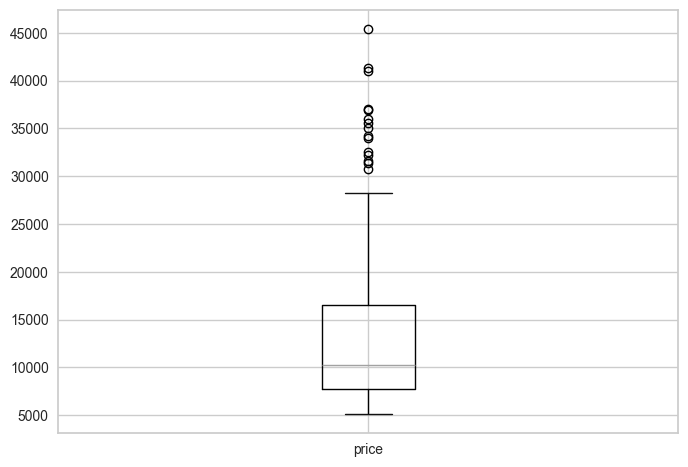

In [59]:
df.boxplot(column=[target_column])

Из 

Для целевой переменной строится гистограмма.

array([[<Axes: title={'center': 'price'}>]], dtype=object)

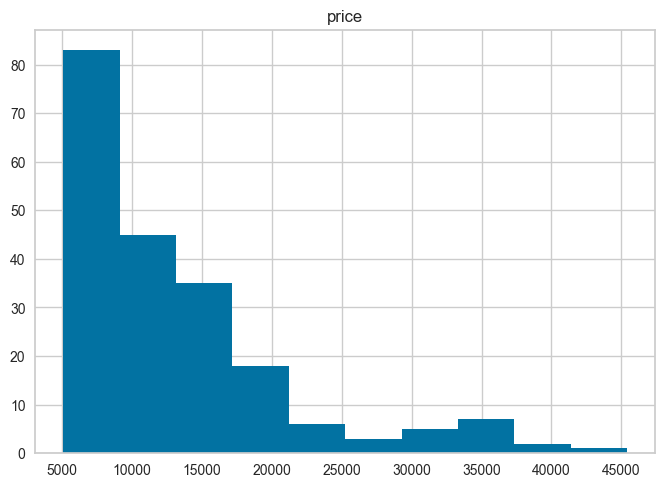

In [60]:
df.hist(column=[target_column])

Из графиков видно, что большинство значений лежит в диапазоне от 0 до 17000. Однако часть автомобилей стоит до 45000.

Строится матрица диаграмм рассеяния.

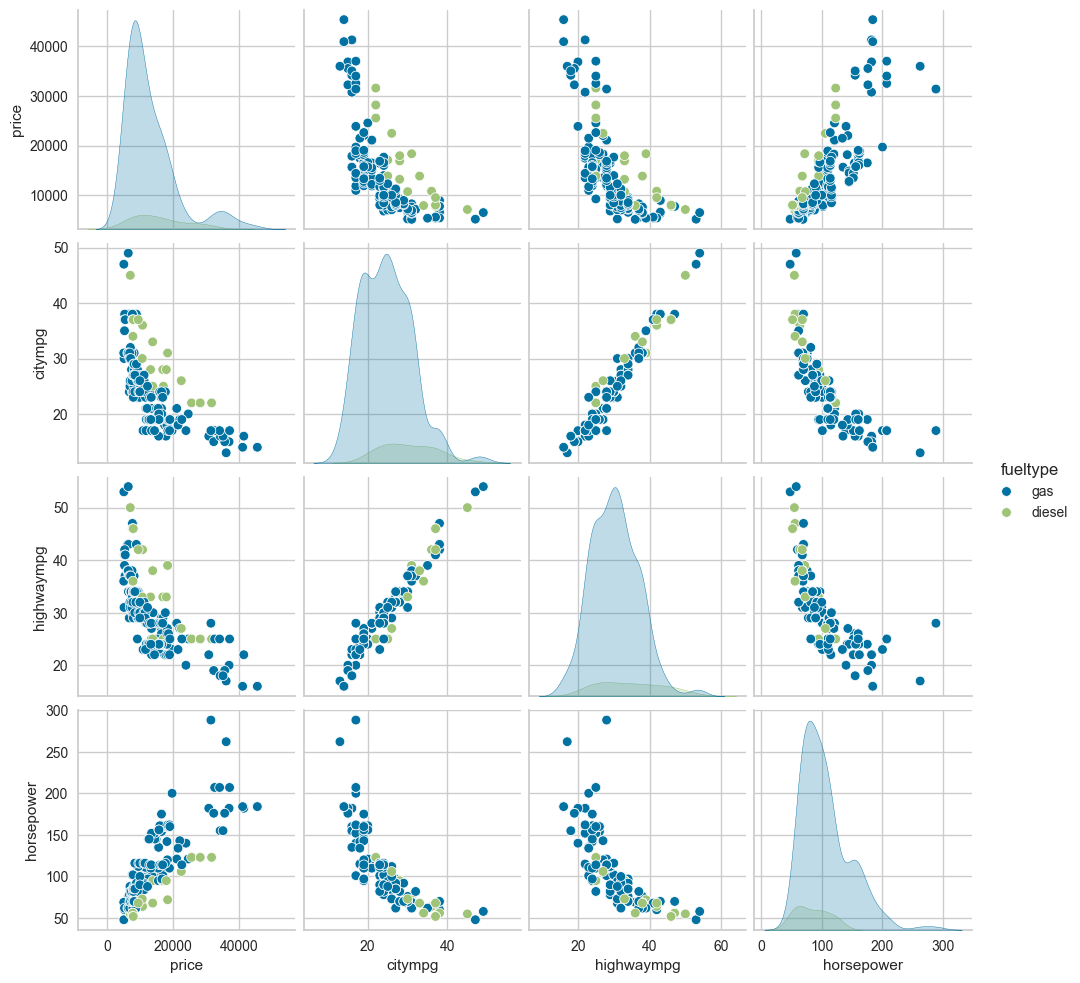

In [61]:
sns.pairplot(df[['price', 'citympg', 'highwaympg', 'horsepower', 'fueltype']], hue = 'fueltype')

Из графика видно, что дизель, при прочих равных, стоит дороже бензинового двигателя. Так же видно, что автомобили с большим пробегом стоят дешевле. Тогда как автомобили с большим количеством лошадиных сил стоят дороже.

Теперь, для разделения данных на обучающую и валидационные выборки, необходимо текстовые данные преобразовать в числовые. Для этого используется LabelEncoder.

In [62]:
text_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in text_columns:
  df[column] = label_encoder.fit_transform(df[column])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


Данные разделяются на обучающую, тестовую и валидационную выборки.
Они делятся в соотношении 60/20/20.

In [63]:
x = df.drop(columns=['price', 'car_ID', 'CarName'])
y = df['price']

x_train, x_temporal, y_train, y_temporal = train_test_split(x, y, random_state=0, test_size=0.4)

x_validation, x_test, y_validation, y_test = train_test_split(x_temporal, y_temporal, random_state=0, test_size=0.5)

С помощью StandardScaler нормализуются числовые данные.

In [64]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_validation)
x_test_scaled = scaler.transform(x_test)

С помощью LinearRegression обучается модель. После этого делается предсказание и подсчитываются метрики качества регрессии (MSE, MAE, RMSE, R2).

In [65]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_validation_pred = model.predict(x_val_scaled)

print('Метрики на валидационной выборке:')
print('MAE:', metrics.mean_absolute_error(y_validation, y_validation_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_validation, y_validation_pred)))
print('MAPE', np.mean(np.abs((y_validation - y_validation_pred) / y_validation)) * 100)
print('R2:', metrics.r2_score(y_validation, y_validation_pred))


Метрики на валидационной выборке:
MAE: 2874.8375147953025
RMSE: 4222.213158101672
MAPE 22.021912134015732
R2: 0.7428091673429433


Модель показывает хорошие результаты. 
Значение R2 = 0.749, что означает, что модель объясняет 74.9% значений. 
Средняя абсолютная ошибка (MAE) составляет 2811, что указывает на среднюю ошибку в прогнозах. 
RMSE выше MAE (4170), что говорит о наличии выбросов. 
Средняя абсолютная процентная ошибка (MAPE) в 23% говорит о том, что модель ошибается в среднем на 23%, что является неплохим результатом.

Создается датафрейм с истинными и предсказанными значениями.

In [66]:
predictions_df = pd.DataFrame({'Истинные': y_validation.values, 'Предсказанные': y_validation_pred}).reset_index(drop=True)
predictions_df

,Истинные,Предсказанные
0,20970.0,14510.062578
1,12290.0,9836.779394
2,8778.0,7209.694833
3,7053.0,7875.536389
4,15750.0,19379.132494
5,22018.0,18652.541787
6,7999.0,4561.112706
7,8916.5,5696.487815
8,23875.0,21644.241122
9,6488.0,8509.485094


Ищутся коэффициенты для каждого признака. Создается датафрейм, содержащий название признака и коэффициент, затем он сортируется по модулю коэффициента.

In [67]:
coefficients = model.coef_
feature_names = x.columns
coef_df = pd.DataFrame({'Признаки': feature_names, 'Коэффициенты': coefficients})
coef_df['Модуль_коэффициента'] = coef_df['Коэффициенты'].abs()
coef_df = coef_df.sort_values(by='Модуль_коэффициента', ascending=False).drop(columns='Модуль_коэффициента').reset_index(drop=True)

coef_df

,Признаки,Коэффициенты
0,enginesize,3143.692275
1,wheelbase,2154.968316
2,enginelocation,1751.379723
3,curbweight,1649.266489
4,citympg,-1522.998715
5,carwidth,1515.889644
6,carlength,-1481.675940
7,fueltype,-1158.784855
8,horsepower,1157.890244
9,boreratio,-1038.356545


Наибольшее положительное влияние на цену оказывают размер двигателя, колесная база, расположение двигателя, масса автомобиля и ширина автомобиля. Эти признаки явно связаны с техническими характеристиками и классом автомобиля.
Наибольшее отрицательное влияние оказывают расход топлива, длина кузова, типа топлива и различные параметры двигателя. Эти признаки связаны с мощностью и эргономичностью автомобиля.
Высота автомобиля, тип двигателя, наличие турбонаддува, количество цилиндров, коэффициент сжатия почти не влияют на цену автомобиля.

Визуализируются фактические и предсказанные значения.

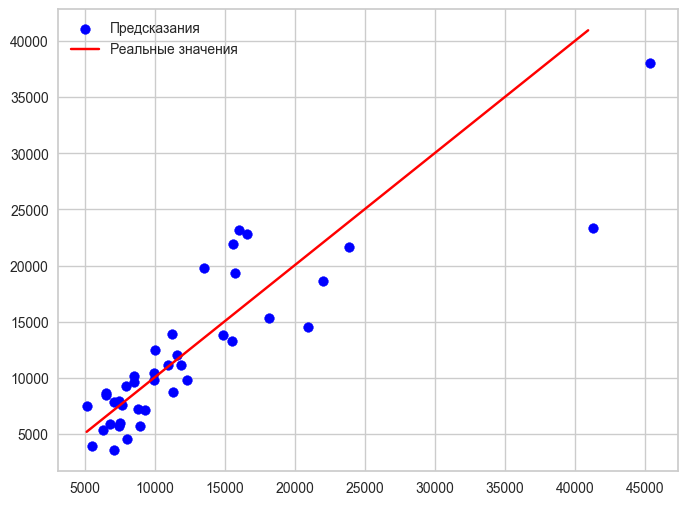

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_validation.values, y_validation_pred, color='blue', label='Предсказания')
plt.plot([y_validation.values.min(), y_train.values.max()], [y_train.values.min(), y_train.values.max()], color='red', label='Реальные значения')
plt.legend(loc='upper left')
plt.show()

Из графика видно, что модель хорошо предсказывает значения, так как линия регрессии проходит недалеко от большинства точек. 

Строится модель методом k-ближайших соседей.

In [69]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train_scaled, y_train)

y_knn_predicted = knn_model.predict(x_val_scaled)

# Evaluate the model
print('Метрики на валидационной выборке для knn-модели:')
print('MAE:', metrics.mean_absolute_error(y_validation, y_knn_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_validation, y_knn_predicted)))
print('MAPE', np.mean(np.abs((y_validation - y_knn_predicted) / y_validation)) * 100)
print('R2:', metrics.r2_score(y_validation, y_knn_predicted))

Метрики на валидационной выборке для knn-модели:
MAE: 2803.3682926829265
RMSE: 4482.14452246287
MAPE 18.40484567930015
R2: 0.710167631119177


KNN показывает результаты хуже, чем линейная регрессия. Визуализируются фактические и предсказанные значения для обоих методов. 

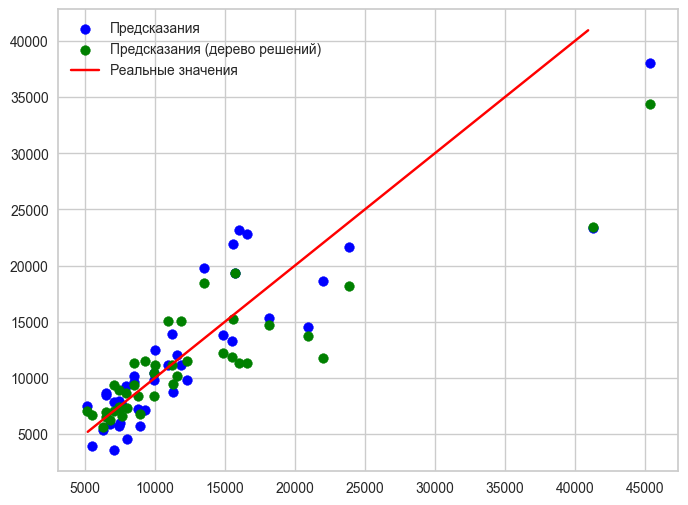

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(y_validation.values, y_validation_pred, color='blue', label='Предсказания')
plt.scatter(y_validation.values, y_knn_predicted, color='green', label='Предсказания (дерево решений)')
plt.plot([y_train.values.min(), y_train.values.max()], [y_train.values.min(), y_train.values.max()], color='red', label='Реальные значения')
plt.legend(loc='upper left')
plt.show()


Визуализация подтверждает, что линейная регрессия показывает лучшие результаты, чем метод k-ближайших соседей. Однако на графике видно, что KNN показывает лучшие результаты на промежутке от 0 до 10000.

## Выводы

В ходе выполнения работы были изучены алгоритмы и методы регрессии на практике. Были обучены модели простой линейной регрессии, полиномиальной регрессии и регрессии методом k-ближайших соседей. Были изучены метрики качества регрессии (MSE, MAE, RMSE, R2). Были построены графики регрессии и визуализированы фактические и предсказанные значения. Были сделаны выводы относительно важности признаков и сравнены результаты, полученные разными методами.
Было выяснено, что полином степени полиномов, в зависимости от данных, может переобучаться. Так же было выяснено, что при увеличении степени полинома увеличивается точность предсказания.
Было установлено, что цена автомобиля позитивно коррелирует с размером двигателя, колесной базой, расположением двигателя, массой автомобиля и шириной автомобиля. Однако цена автомобиля негативно коррелирует с расходом топлива, длиной кузова, типом топлива и различными параметрами двигателя. С другими параметрами цена автомобиля почти не коррелирует.
Так же было выяснено, что линейная регрессия показывает лучшие результаты, чем метод k-ближайших соседей. Однако на маленьких значениях KNN показывает лучшие результаты. 